# Resolve polinomiais

Importar bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import control as ct
from Polinomial import Sylvester
from control.matlab import *
%matplotlib inline
s = ct.TransferFunction.s

Funções pedidas

In [2]:
G1 = (5*(s + 0.5))/((s+2)*s)
G2 = (5*(s**2 + 6*s + 13)*(s + 0.5))/((s - 2)*(s - 1)*(s**2 + 8*s + 41))
G3 = (5*(s - 5))/((s - 2)*(s + 2))
G4 = (5*(s - 5))/((s - 2)*s**2)

print("G1 = {0} \n\nG2 = {1} \n\nG3 = {2} \n\nG4 = {3} ".format(G1,G2,G3,G4))

G1 = 
5 s + 2.5
---------
s^2 + 2 s
 

G2 = 
  5 s^3 + 32.5 s^2 + 80 s + 32.5
---------------------------------
s^4 + 5 s^3 + 19 s^2 - 107 s + 82
 

G3 = 
5 s - 25
--------
s^2 - 4
 

G4 = 
  5 s - 25
-----------
s^3 - 2 s^2
 


# G1

Definir controlador para G1 (polo em -0.5 para cancelar zero de G1 e polos seguindo especificações)

In [3]:
sylv1 = Sylvester(G1)
C1 = sylv1.C(1,10)
print(C1)


451.9 s + 732.5
---------------
    s - 2213



In [6]:
sylv1 = Sylvester(G1)
d = sylv1.PolosOS(1,10)
d.append(-0.5)
D=1
for i in d:
    D = D*(s-i)
D = np.transpose([ct.tfdata(D)[0][0][0][::-1]]).real
C2 = sylv1.C(1,10,D)
print(C2)


1.2 s + 9.157
-------------
   s + 0.5



In [11]:
sylv1 = Sylvester(G1)
d = sylv1.PolosOS(1,2.5)
d.append(-0.5)
D=1
for i in d:
    D = D*(s-i)
D = np.transpose([ct.tfdata(D)[0][0][0][::-1]]).real
C3 = sylv1.C(1,10,D)
print(C3)


1.2 s + 5.521
-------------
   s + 0.5



Imprimindo a curva da resposta ao degrau em malha fechada de G1

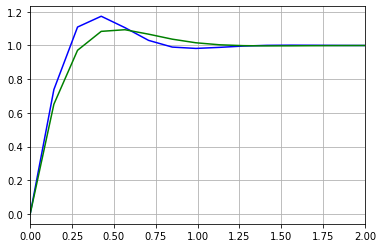

{'RiseTime': 0.0, 'SettlingTime': 1.692192192192192, 'SettlingMin': -8.617333617980947, 'SettlingMax': 39.60299400756052, 'Overshoot': 4095.501282047428, 'Undershoot': -8.617333617980947, 'Peak': 39.60299400756052, 'PeakTime': 0.052552552552552555, 'SteadyStateValue': 0.9439395043691665}


In [13]:
#MF1 = ct.feedback(series(C1, G1))
MF2 = ct.feedback(series(C2, G1))
MF3 = ct.feedback(series(C3, G1))

plt.figure(1)
#T1, yout1  = ct.step_response(MF1)
#plt.plot(T1.T, yout1.T,'r')
T2, yout2  = ct.step_response(MF2)
plt.plot(T2.T, yout2.T,'b')
T3, yout3  = ct.step_response(MF3)
plt.plot(T3.T, yout3.T,'g')

#Tp, youtp  = ct.step_response(MF2)
#plt.plot(Tp.T, youtp.T,'b')
plt.xlim(0,2)
#plt.ylim(0,1.5)
plt.grid()
plt.show(block=False)
print(stepinfo(MF1))
#print(stepinfo(MF2))

Definir novo controlador para G1, para corrigir o overshoot para 10%

In [6]:
sylv1 = Sylvester(G1)
d = sylv1.PolosOS(1,2.5)
d.append(-0.5)
D=1
for i in d:
    D = D*(s-i)
D = np.transpose([ct.tfdata(D)[0][0][0][::-1]]).real
C3 = sylv1.C(1,10,D)
print(C3)


1.2 s + 5.521
-------------
   s + 0.5



Imprimindo a nova curva da resposta ao degrau em malha fechada de G1

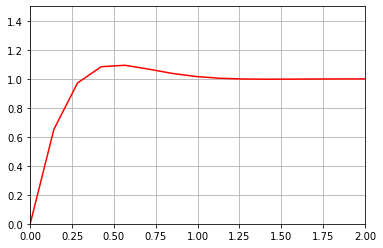

{'RiseTime': 0.22422422422422436, 'SettlingTime': 0.9669669669669675, 'SettlingMin': 0.9240611149068892, 'SettlingMax': 1.0967973258719008, 'Overshoot': 9.679732587190106, 'Undershoot': 0.0, 'Peak': 1.0967973258719008, 'PeakTime': 0.5185185185185188, 'SteadyStateValue': 0.9999999999999998}
{'RiseTime': 0.01401401401401402, 'SettlingTime': 1.5975975975975985, 'SettlingMin': 0.08162949088160051, 'SettlingMax': 0.4479403321068657, 'Overshoot': 394.6088472442925, 'Undershoot': 0.0, 'Peak': 0.4479403321068657, 'PeakTime': 0.22422422422422433, 'SteadyStateValue': 0.09056456118861603}


In [7]:
MF1 = ct.feedback(series(C1, G1))
MF2 = ct.feedback(G1, C1)
plt.figure(1)
Ts, youts  = ct.step_response(MF1)
plt.plot(Ts.T, youts.T,'r')
#Tp, youtp  = ct.step_response(MF2)
#plt.plot(Tp.T, youtp.T,'b')
plt.xlim(0,2)
plt.ylim(0,1.5)
plt.grid()
plt.show(block=False)
print(stepinfo(MF1))
print(stepinfo(MF2))

Bode Plot



	 A margem de ganho da entrada é inf dB na frequência nan Hz 

	 A margem de fase da entrada é 139.1° na frequência 5.216 Hz


	 A margem de ganho do distúrbio é 1.6 dB na frequência 4.858 Hz 

	 A margem de fase da entrada é inf° na frequência nan Hz


	 A margem de ganho do ruído é 1.0 dB na frequência 0.0 Hz 

	 A margem de fase da entrada é -40.87° na frequência 5.216 Hz


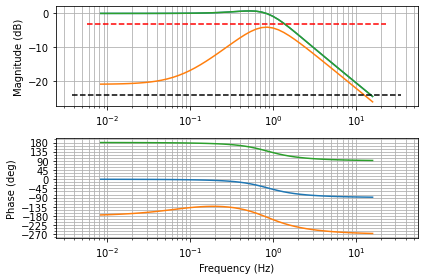

In [98]:
MF1 = ct.feedback(series(C1, G1))         #entrada (Azul)
MF2 = ct.feedback(-G1,C1,sign=1)          #preturbação (Amarelo)
MF3 = ct.feedback(series(-C1, G1),sign=1) #ruido (Verde)

w = np.logspace(e-4,2)
ct.bode_plot([MF1,MF2,MF3],w)
#ct.bode_plot([MF1])
plt.tight_layout()

ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[-3,-3],'r--')
plt.plot(plt.xlim(),[-24,-24],'k--')

print('\n\n\t A margem de ganho da entrada é {0:.4} dB na frequência {1:.4} Hz \n\n\t A margem de fase da entrada é {2:.4}° na frequência {3:.4} Hz'.format(margin(MF1)[0],margin(MF1)[2],margin(MF1)[1],margin(MF1)[3]))
print('\n\n\t A margem de ganho do distúrbio é {0:.4} dB na frequência {1:.4} Hz \n\n\t A margem de fase da entrada é {2:.4}° na frequência {3:.4} Hz'.format(margin(MF2)[0],margin(MF2)[2],margin(MF2)[1],margin(MF2)[3]))
print('\n\n\t A margem de ganho do ruído é {0:.4} dB na frequência {1:.4} Hz \n\n\t A margem de fase da entrada é {2:.4}° na frequência {3:.4} Hz'.format(margin(MF3)[0],margin(MF3)[2],margin(MF3)[1],margin(MF3)[3]))


# G2

Definir controlador para G2 (polo seguindo especificações E G2 pré-compensado)

In [26]:
PG2 = (s**2 + 8*s + 41)/((s**2 + 6*s + 13))
PG2 = (ct.dcgain(PG2)**-1)*PG2
G2n = minreal(PG2*G2)
sylv2 = Sylvester(G2n)
d = sylv2.PolosOS(1,0)
d.append(-0.5)
d.append(-40)
D=1
for i in d:
    D = D*(s-i)
D = np.transpose([ct.tfdata(D)[0][0][0][::-1]]).real
C2 = sylv2.C(1,0,D)
print(C2)
print(D)
print(sylv2.E())

4 states have been removed from the model

29.65 s + 99.66
---------------
    s + 0.5

[[ 80. ]
 [182. ]
 [ 44.5]
 [  1. ]]
[[ 2.          0.          0.79268293  0.        ]
 [-3.          2.          1.58536585  0.79268293]
 [ 1.         -3.          0.          1.58536585]
 [ 0.          1.          0.          0.        ]]


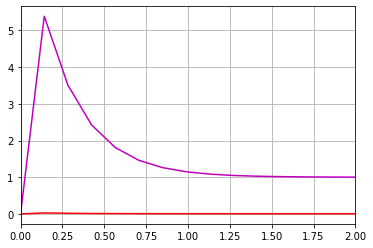

{'RiseTime': 0.0, 'SettlingTime': 1.4994994994994995, 'SettlingMin': 0.9999999999999875, 'SettlingMax': 6.344387404617433, 'Overshoot': 534.4387404617501, 'Undershoot': 0.0, 'Peak': 6.344387404617433, 'PeakTime': 0.07007007007007007, 'SteadyStateValue': 0.9999999999999895}
201.8461538461538
{'RiseTime': 0.0, 'SettlingTime': 1.4994994994994995, 'SettlingMin': 0.004954268292682865, 'SettlingMax': 0.03143179735519308, 'Overshoot': 534.4387404617501, 'Undershoot': 0.0, 'Peak': 0.03143179735519308, 'PeakTime': 0.07007007007007007, 'SteadyStateValue': 0.004954268292682875}


In [27]:
MF1 = (ct.dcgain(ct.feedback(G2n, C2)**-1))*ct.feedback(G2n, C2)
MF2 = ct.feedback(G2n, C2)
#ct.dcgain(MF1)
plt.figure(1)
Ts, youts  = ct.step_response(MF1)
plt.plot(Ts.T, youts.T,'m')
Tp, youtp  = ct.step_response(MF2)
plt.plot(Tp.T, youtp.T,'r')
plt.grid()
plt.xlim(0,2)
plt.show(block=False)
print(stepinfo(MF1))
print(ct.dcgain(ct.feedback(G2n, C2))**-1)
print(stepinfo(MF2))

Controlador compensando 

In [30]:
PG2 = (s**2 + 8*s + 41)/((s**2 + 6*s + 13))
PG2 = (ct.dcgain(PG2)**-1)*PG2
G2n = minreal(PG2*G2)
sylv2 = Sylvester(G2n)
d = sylv2.PolosOS(1,0)
d.append(-0.5)
d.append(-0.499)
D=1
for i in d:
    D = D*(s-i)
D = np.transpose([ct.tfdata(D)[0][0][0][::-1]]).real
C1 = sylv2.C(1,0,D)
print(C1)
print(D)
print(sylv2.E())


4 states have been removed from the model

4.73 s - 0.002523
-----------------
     s + 0.5

[[0.998 ]
 [4.2455]
 [4.999 ]
 [1.    ]]
[[ 2.          0.          0.79268293  0.        ]
 [-3.          2.          1.58536585  0.79268293]
 [ 1.         -3.          0.          1.58536585]
 [ 0.          1.          0.          0.        ]]


In [31]:
PG2 = (s**2 + 8*s + 41)/((s**2 + 6*s + 13))
PG2 = (ct.dcgain(PG2)**-1)*PG2
G2n = minreal(PG2*G2)
sylv2 = Sylvester(G2n)
d = sylv2.PolosOS(1,0)
d.append(-0.5)
d.append(-0.499)
D=1
for i in d:
    D = D*(s-i)
D = np.transpose([ct.tfdata(D)[0][0][0][::-1]]).real
C2 = sylv2.C(1,0,D)
print(C2)
print(D)
print(sylv2.E())


4 states have been removed from the model

4.73 s - 0.002523
-----------------
     s + 0.5

[[0.998 ]
 [4.2455]
 [4.999 ]
 [1.    ]]
[[ 2.          0.          0.79268293  0.        ]
 [-3.          2.          1.58536585  0.79268293]
 [ 1.         -3.          0.          1.58536585]
 [ 0.          1.          0.          0.        ]]


Imprimindo a nova curva da resposta ao degrau em malha fechada de G2

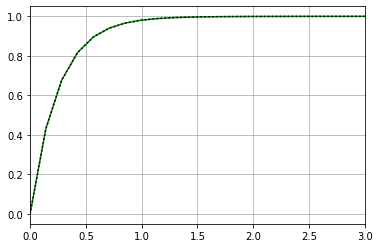

{'RiseTime': 0.56168392841775, 'SettlingTime': 0.9969889729415061, 'SettlingMin': 0.9040056161344969, 'SettlingMax': 0.9999979162937097, 'Overshoot': 0.0, 'Undershoot': 0.0, 'Peak': 0.9999979162937097, 'PeakTime': 14.028056112233305, 'SteadyStateValue': 0.9999979162937097}


In [33]:
MF1 = (ct.dcgain(ct.feedback(G2n, C1)**-1))*ct.feedback(G2n, C1)
MF2 = (ct.dcgain(ct.feedback(G2n, C2)**-1))*ct.feedback(G2n, C2)
#ct.dcgain(MF1)
plt.figure(1)
Ts, youts  = ct.step_response(MF1)
plt.plot(Ts.T, youts.T,'g')
Tp, youtp  = ct.step_response(MF2)
plt.plot(Tp.T, youtp.T,'k:')
plt.grid()
plt.xlim(0,3)
plt.show(block=False)
#print(stepinfo(MF1))
print(stepinfo(MF2))

Bode plot



	 A margem de ganho da entrada é inf dB na frequência nan Hz 

	 A margem de fase da entrada é inf° na frequência nan Hz


	 A margem de ganho do distúrbio é 0.5999 dB na frequência 1.414 Hz 

	 A margem de fase da entrada é -53.13° na frequência 6.316 Hz


	 A margem de ganho do ruído é 1.229 dB na frequência 0.0 Hz 

	 A margem de fase da entrada é 25.29° na frequência 1.327 Hz


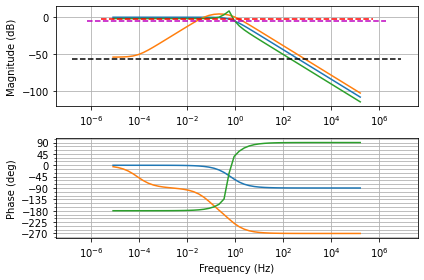

In [112]:
MF1 = (ct.dcgain(ct.feedback(G2n, C2)**-1))*ct.feedback(G2n, C2) #Entrada (Azul)
MF2 = ct.feedback(series(-G2n, C2),sign=1)                       #Disturbio (Amarelo)
MF3 = ct.feedback(series(C1, -G2n),sign=1)                       #Ruido (Verde)

#w = np.logspace(e-4,2) #com zoom
w = np.logspace(e-7,6)#sem zoom 
ct.bode_plot([MF1,MF2,MF3],w)
#ct.bode_plot([MF1])
plt.tight_layout()

ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[-3,-3],'r--')
plt.plot(plt.xlim(),[-5,-5],'m--')
plt.plot(plt.xlim(),[-57,-57],'k--')


print('\n\n\t A margem de ganho da entrada é {0:.4} dB na frequência {1:.4} Hz \n\n\t A margem de fase da entrada é {2:.4}° na frequência {3:.4} Hz'.format(margin(MF1)[0],margin(MF1)[2],margin(MF1)[1],margin(MF1)[3]))
print('\n\n\t A margem de ganho do distúrbio é {0:.4} dB na frequência {1:.4} Hz \n\n\t A margem de fase da entrada é {2:.4}° na frequência {3:.4} Hz'.format(margin(MF2)[0],margin(MF2)[2],margin(MF2)[1],margin(MF2)[3]))
print('\n\n\t A margem de ganho do ruído é {0:.4} dB na frequência {1:.4} Hz \n\n\t A margem de fase da entrada é {2:.4}° na frequência {3:.4} Hz'.format(margin(MF3)[0],margin(MF3)[2],margin(MF3)[1],margin(MF3)[3]))


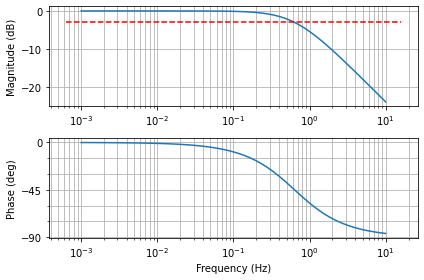

In [55]:
MF1 = (ct.dcgain(ct.feedback(G2n, C2)**-1))*ct.feedback(G2n, C2)

mag1,phase1,omega1 = ct.bode_plot(MF1,dB=True)
plt.tight_layout()

ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[-3,-3],'r--')


# G3

Controlador pra G3 para menor undershoot

In [20]:
G = G3
sy = Sylvester(G)
C = sy.C(1,5)
print(C)


-31.66 s - 86.76
----------------
    s + 206.3



In [94]:
G =G3

sy = Sylvester(G)

ts = 0.7
ts0,ts1,ts2 = [],[],[]
Mup0,Mup1,Mup2 = [],[],[]
Mdown1,Mdown2 = [],[]

#Testar diferentes parâmetros para o controlador
while ts <= 1.4:
                for Mup in range(0,50,2):
                                C = sy.C(ts, Mup)
                                MF1 = ct.dcgain(ct.feedback(series(C, G)))**(-1)*ct.feedback(series(G, C))
                                MF2 = ct.dcgain(ct.feedback(G, C))**(-1)*ct.feedback(G, C)
                                #salvar o tempo de acomodação
                                ts0.append(ts)  #tempo parametrizado
                                ts1.append(stepinfo(MF1)['SettlingTime']) #tempo atingido
                                ts2.append(stepinfo(MF2)['SettlingTime'])
                                #salvar overshoot
                                Mup0.append(Mup)  #overshoot parametrizado
                                Mup1.append(stepinfo(MF1)['Overshoot']) #overshoot atingido
                                Mup2.append(stepinfo(MF2)['Overshoot'])
                                #salvar undershoots atingidos
                                Mdown1.append(stepinfo(MF1)['Undershoot'])
                                Mdown2.append(stepinfo(MF2)['Undershoot'])
                ts += 0.1

melhorSerie = 0
melhorParalelo = 0

for i in range(1, len(ts0) - 1):  #Verificar qual controlador calculado apresenta melhor desempenho 
                #Verificar controlador em série
                if ts1[i] <= 1.05:
                                if Mdown1[i] <= Mdown1[i-1]:
                                                melhorSerie = i
                #Verificar controlador em paralelo
                if ts2[i] <= 1.05:
                                if Mdown2[i] <= Mdown2[i-1]:
                                                melhorParalelo = i

In [95]:
####CALCULAR MELHOR CONTROLADOR EM SÉRIE
C = sy.C(ts0[melhorSerie],Mup0[melhorSerie])

print('\n\n\t Melhor Controlador em Série: \n', C)
print("\n\n\t ts = {0}s e OS = {1}% ".format(ts0[melhorSerie],Mup0[melhorSerie]))



####CALCULAR MELHOR CONTROLADOR EM PARALELO
C = sy.C(ts0[melhorParalelo],Mup0[melhorParalelo])

print('\n\n\t Melhor Controlador em Paralelo: \n', C)
print("\n\n\t ts = {0}s e OS = {1}% ".format(ts0[melhorParalelo],Mup0[melhorParalelo]))




	 Melhor Controlador em Série: 
 
-68.13 s - 223.9
----------------
    s + 400.7



	 ts = 0.7999999999999999s e OS = 12% 


	 Melhor Controlador em Paralelo: 
 
-36.88 s - 110.4
----------------
    s + 232.4



	 ts = 0.9999999999999999s e OS = 10% 


Imprimir resposta ao degrau de G3

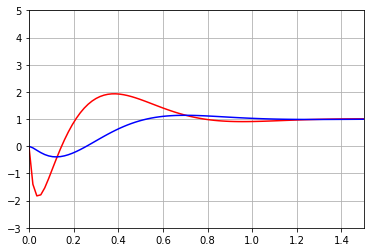


	 {'RiseTime': 0.050800800800800794, 'SettlingTime': 1.27002002002002, 'SettlingMin': 0.9069799189204205, 'SettlingMax': 1.9302112642272322, 'Overshoot': 92.22751081821119, 'Undershoot': -1.8485282749952032, 'Peak': 1.9302112642272322, 'PeakTime': 0.3818818818818819, 'SteadyStateValue': 1.0041285225050984}

	 {'RiseTime': 0.20320320320320318, 'SettlingTime': 1.0195195195195195, 'SettlingMin': 0.9045824990161068, 'SettlingMax': 1.1389562761560565, 'Overshoot': 13.783764330864585, 'Undershoot': -0.39146471735860744, 'Peak': 1.1389562761560565, 'PeakTime': 0.698948948948949, 'SteadyStateValue': 1.0009831216729286}


In [96]:
MF1 = ct.dcgain(ct.feedback(series(C, G)))**(-1)*ct.feedback(series(G, C))
MF2 = ct.dcgain(ct.feedback(G, C))**(-1)*ct.feedback(G, C)

plt.figure(2)
youts, Ts = step(MF1)
plt.plot(Ts.T, youts.T,'r')
youts, Ts = step(MF2)
plt.plot(Ts.T, youts.T,'b')
plt.xlim(0,1.5)
plt.ylim(-3,5)
plt.grid()
plt.show(block=False)

print("\n\t", stepinfo(MF1))
print("\n\t", stepinfo(MF2))

Controlador pra G3 para menor Ts

In [92]:
G =G3

sy = Sylvester(G)

ts = 0.7
ts0,ts1,ts2 = [],[],[]
Mup0,Mup1,Mup2 = [],[],[]
Mdown1,Mdown2 = [],[]

#Testar diferentes parâmetros para o controlador
while ts <= 1.4:
                for Mup in range(0,50,2):
                                C = sy.C(ts, Mup)
                                MF1 = ct.dcgain(ct.feedback(series(C, G)))**(-1)*ct.feedback(series(G, C))
                                MF2 = ct.dcgain(ct.feedback(G, C))**(-1)*ct.feedback(G, C)
                                #salvar o tempo de acomodação
                                ts0.append(ts)  #tempo parametrizado
                                ts1.append(stepinfo(MF1)['SettlingTime']) #tempo atingido
                                ts2.append(stepinfo(MF2)['SettlingTime'])
                                #salvar overshoot
                                Mup0.append(Mup)  #overshoot parametrizado
                                Mup1.append(stepinfo(MF1)['Overshoot']) #overshoot atingido
                                Mup2.append(stepinfo(MF2)['Overshoot'])
                                #salvar undershoots atingidos
                                Mdown1.append(stepinfo(MF1)['RiseTime'])
                                Mdown2.append(stepinfo(MF2)['RiseTime'])
                ts += 0.1

melhorSerie = 0
melhorParalelo = 0

for i in range(1, len(ts0) - 1):  #Verificar qual controlador calculado apresenta melhor desempenho 
                #Verificar controlador em série
                if ts1[i] <= 1.05:
                                if Mdown1[i] <= Mdown1[i-1]:
                                                melhorSerie = i
                #Verificar controlador em paralelo
                if ts2[i] <= 1.05:
                                if Mdown2[i] <= Mdown2[i-1]:
                                                melhorParalelo = i

In [93]:
####CALCULAR MELHOR CONTROLADOR EM SÉRIE
C = sy.C(ts0[melhorSerie],Mup0[melhorSerie])

print('\n\n\t Melhor Controlador em Série: \n', C)
print("\n\n\t ts = {0}s e OS = {1}% ".format(ts0[melhorSerie],Mup0[melhorSerie]))



####CALCULAR MELHOR CONTROLADOR EM PARALELO
C = sy.C(ts0[melhorParalelo],Mup0[melhorParalelo])


print('\n\n\t Melhor Controlador em Paralelo: \n', C)
print("\n\n\t ts = {0}s e OS = {1}% ".format(ts0[melhorParalelo],Mup0[melhorParalelo]))




	 Melhor Controlador em Série: 
 
-68.13 s - 223.9
----------------
    s + 400.7



	 ts = 0.7999999999999999s e OS = 12% 


	 Melhor Controlador em Paralelo: 
 
-36.88 s - 110.4
----------------
    s + 232.4



	 ts = 0.9999999999999999s e OS = 10% 


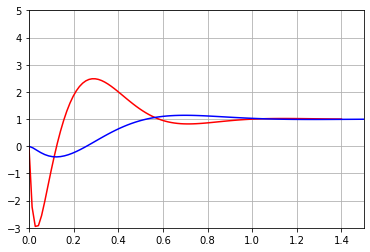


	 {'RiseTime': 0.026626626626626626, 'SettlingTime': 0.9655655655655652, 'SettlingMin': 0.821733680947561, 'SettlingMax': 2.4855313933492877, 'Overshoot': 148.17688255240088, 'Undershoot': -2.997590913288365, 'Peak': -2.997590913288365, 'PeakTime': 0.03363363363363362, 'SteadyStateValue': 1.0015160831204672}

	 {'RiseTime': 0.20320320320320318, 'SettlingTime': 1.0195195195195195, 'SettlingMin': 0.9045824990161068, 'SettlingMax': 1.1389562761560565, 'Overshoot': 13.783764330864585, 'Undershoot': -0.39146471735860744, 'Peak': 1.1389562761560565, 'PeakTime': 0.698948948948949, 'SteadyStateValue': 1.0009831216729286}


In [94]:
MF1 = ct.dcgain(ct.feedback(series(C, G)))**(-1)*ct.feedback(series(G, C))
MF2 = ct.dcgain(ct.feedback(G, C))**(-1)*ct.feedback(G, C)

plt.figure(2)
youts, Ts = step(MF1)
plt.plot(Ts.T, youts.T,'r')
youts, Ts = step(MF2)
plt.plot(Ts.T, youts.T,'b')
plt.xlim(0,1.5)
plt.ylim(-3,5)
plt.grid()
plt.show(block=False)

print("\n\t", stepinfo(MF1))
print("\n\t", stepinfo(MF2))

Bode G3 Série 



	 A margem de ganho da entrada é 0.3477 dB na frequência 21.24 Hz 

	 A margem de fase da entrada é -66.0° na frequência 115.9 Hz


	 A margem de ganho do distúrbio é 0.2589 dB na frequência 8.451 Hz 

	 A margem de fase da entrada é -86.65° na frequência 25.57 Hz


	 A margem de ganho do ruído é 0.6633 dB na frequência 0.0 Hz 

	 A margem de fase da entrada é 105.7° na frequência 180.2 Hz


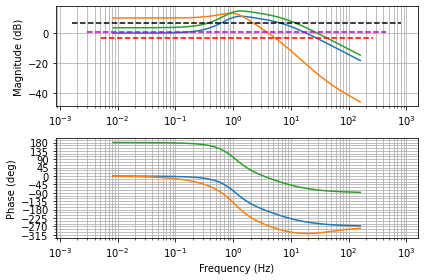

In [120]:
MF1 = ct.dcgain(ct.feedback(series(C, G)))**(-1)*ct.feedback(series(G, C)) #Entrada (Azul)
MF2 = ct.feedback(-G,C,sign=1)                                             #preturbação (Amarelo)
MF3 = ct.feedback(series(-C, G),sign=1)                                    #ruido (Verde)

w = np.logspace(e-4,3) #com zoom
#w = np.logspace(e-20,17)#sem zoom 
ct.bode_plot([MF1,MF2,MF3],w)
#ct.bode_plot([MF1])
plt.tight_layout()

ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[-3,-3],'r--')
plt.plot(plt.xlim(),[1,1],'m--')
plt.plot(plt.xlim(),[7,7],'k--')


print('\n\n\t A margem de ganho da entrada é {0:.4} dB na frequência {1:.4} Hz \n\n\t A margem de fase da entrada é {2:.4}° na frequência {3:.4} Hz'.format(margin(MF1)[0],margin(MF1)[2],margin(MF1)[1],margin(MF1)[3]))
print('\n\n\t A margem de ganho do distúrbio é {0:.4} dB na frequência {1:.4} Hz \n\n\t A margem de fase da entrada é {2:.4}° na frequência {3:.4} Hz'.format(margin(MF2)[0],margin(MF2)[2],margin(MF2)[1],margin(MF2)[3]))
print('\n\n\t A margem de ganho do ruído é {0:.4} dB na frequência {1:.4} Hz \n\n\t A margem de fase da entrada é {2:.4}° na frequência {3:.4} Hz'.format(margin(MF3)[0],margin(MF3)[2],margin(MF3)[1],margin(MF3)[3]))

Bode G3 Paralelo



	 A margem de ganho da entrada é 0.8213 dB na frequência 8.451 Hz 

	 A margem de fase da entrada é -21.78° na frequência 10.26 Hz


	 A margem de ganho do distúrbio é 0.2589 dB na frequência 8.451 Hz 

	 A margem de fase da entrada é -86.65° na frequência 25.57 Hz


	 A margem de ganho do ruído é 0.6633 dB na frequência 0.0 Hz 

	 A margem de fase da entrada é 105.7° na frequência 180.2 Hz


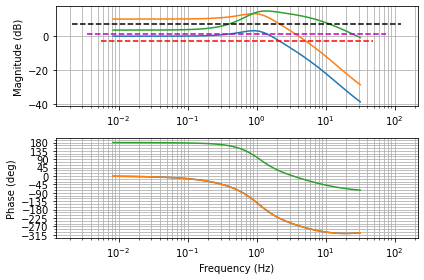

In [127]:
MF1 = (ct.dcgain(ct.feedback(G, C)**-1))*ct.feedback(G, C) #Entrada (Azul)
MF2 = ct.feedback(-G,C,sign=1)          #preturbação (Amarelo)
MF3 = ct.feedback(series(C, -G),sign=1) #ruido (Verde)

w = np.logspace(e-4,2.3) #com zoom
#w = np.logspace(e-20,17)#sem zoom 
ct.bode_plot([MF1,MF2,MF3],w)
#ct.bode_plot([MF1])
plt.tight_layout()

ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[-3,-3],'r--')
plt.plot(plt.xlim(),[1,1],'m--')
plt.plot(plt.xlim(),[7,7],'k--')


print('\n\n\t A margem de ganho da entrada é {0:.4} dB na frequência {1:.4} Hz \n\n\t A margem de fase da entrada é {2:.4}° na frequência {3:.4} Hz'.format(margin(MF1)[0],margin(MF1)[2],margin(MF1)[1],margin(MF1)[3]))
print('\n\n\t A margem de ganho do distúrbio é {0:.4} dB na frequência {1:.4} Hz \n\n\t A margem de fase da entrada é {2:.4}° na frequência {3:.4} Hz'.format(margin(MF2)[0],margin(MF2)[2],margin(MF2)[1],margin(MF2)[3]))
print('\n\n\t A margem de ganho do ruído é {0:.4} dB na frequência {1:.4} Hz \n\n\t A margem de fase da entrada é {2:.4}° na frequência {3:.4} Hz'.format(margin(MF3)[0],margin(MF3)[2],margin(MF3)[1],margin(MF3)[3]))


# G4

Controlador pra G4

In [27]:
sylv4 = Sylvester(G4)
C4 = sylv4.C(0.8,15)
P4 = sylv4.PolosOS(0.8,15)
print(G4)
print(C4)
print(P4)



  5 s - 25
-----------
s^3 - 2 s^2


-6.877e+04 s^2 - 1.62e+05 s - 4.401e+05
---------------------------------------
        s^2 + 159 s + 3.529e+05

[(-4.999999999999999+8.279899739126861j), (-4.999999999999999-8.279899739126861j)]


Imprimir resposta ao degrau de G4

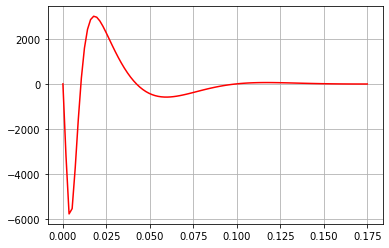

IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [26]:
MF1 = ct.feedback(series(C4, G4))
MF2 = ct.feedback(C4, G4)
#print(ct.dcgain(G1))
plt.figure(1)
youts, Ts = step(MF1)
plt.plot(Ts.T, youts.T,'r')
#youtp, Tp = step(MF2)
#plt.plot(Tp.T, youtp.T,'b')
plt.grid()
plt.show(block=False)
print(stepinfo(MF1))
#print(stepinfo(MF2))

Teste do exemplo

In [ ]:
G = (s + 2)/(s**2+s+0.5)
sylv = Sylvester(G)
C = sylv.D(5,15)



In [ ]:
MF1 = ct.feedback(series(C, G))
#MF2 = ct.feedback(C, G)
plt.figure(1)
youts, Ts = step(MF1)
plt.plot(Ts.T, youts.T,'r')
#youtp, Tp = step(MF2)
#plt.plot(Tp.T, youtp.T,'b')
plt.grid()
plt.show(block=False)
print(stepinfo(MF1))
#print(stepinfo(MF2))